Creating RawArray with float64 data, n_channels=125, n_times=34795
    Range : 0 ... 34794 =      0.000 ...   278.352 secs
Ready.


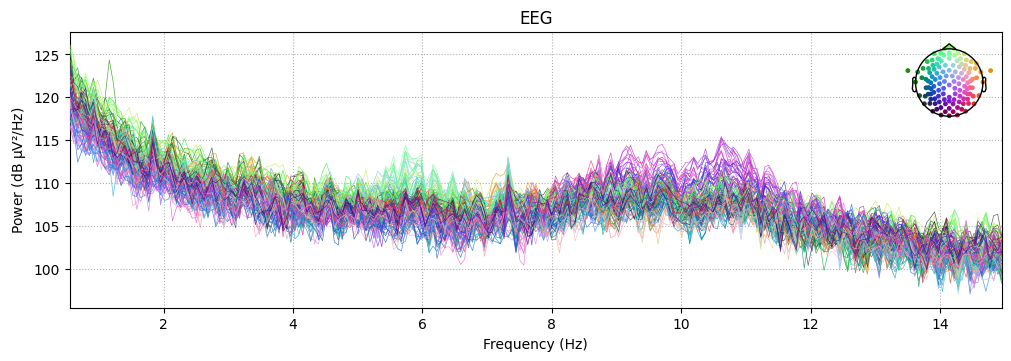

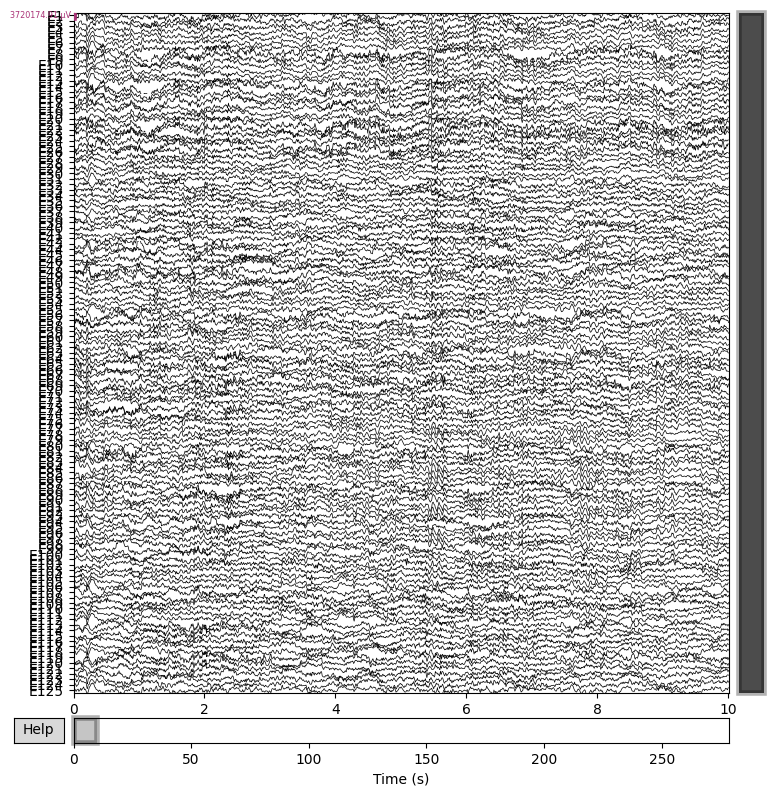

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 16.384 (s)
Plotting power spectral density (dB=True).


c:\Users\napat\AppData\Local\Programs\Python\Python311\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


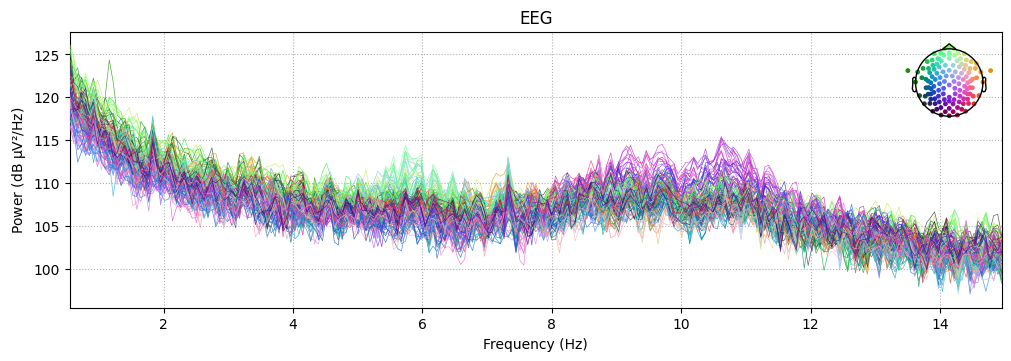

In [18]:
# Define directories
in_dir = r'D:\Imputed_file'    # EEG data folder
miscDir = r'C:\Users\napat\Documents\GitHub\BCC_2024\Code\Misc'     # Misc folder (if necessary)
import scipy.io
import mne

# Load the data from the .mat file (example for one song's EEG data)
mat_data = scipy.io.loadmat('D:\Imputed_file\song21_Imputed.mat')

# Extract EEG data (assuming 'data21' is the key holding the EEG data)
eeg_data = mat_data['data21']

# Define channel names for the 128-channel EGI system but use only the first 125
montage = mne.channels.make_standard_montage('GSN-HydroCel-128')

# Adjust the montage and info for only 125 channels
ch_names = montage.ch_names[:125]  # Only take the first 125 channel names
info = mne.create_info(ch_names=ch_names, sfreq=125, ch_types='eeg')

# Average the EEG data across participants (optional, or you can choose a specific participant)
eeg_data_avg = eeg_data.mean(axis=2)

# Create the MNE Raw object
raw = mne.io.RawArray(eeg_data_avg, info)

# Set the montage (spatial positions of the electrodes)
raw.set_montage(montage)

# Plot all EEG channels in the time domain
raw.plot(n_channels=125, scalings='auto', title='EEG data', show=True, block=True)

raw.plot_psd(fmin=0.5, fmax=15, n_fft=2048, show=True)

